In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Wczytanie danych

In [2]:
users_df = pd.read_json("dane/users.jsonl", lines=True)
deliveries_df = pd.read_json("dane/deliveries.jsonl", lines=True)
products_df = pd.read_json("dane/products.jsonl", lines=True)
sessions_df = pd.read_json("dane/sessions.jsonl", lines=True)

### Funkcja rysująca wykres słupkowy

In [100]:
def plot_bar(series, title="", ylabel="", xlabel="", rotation=0, figsize=None):
    idx = series.index.tolist()
    for i in range(len(idx)):
        idx[i] = str(idx[i])
    if figsize is not None:
        plt.figure(figsize=figsize)
    plt.bar(idx, series.values)
    
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.show()

# Analiza każdej tabeli z osobna

## Użytkownicy

In [4]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  200 non-null    int64 
 1   name     200 non-null    object
 2   city     200 non-null    object
 3   street   200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB


In [5]:
users_df

,user_id,name,city,street
0,102,Klara Sałuda,Szczecin,ulica Dębowa 64/65
1,103,Mieszko Ziegler,Kraków,ulica Bolesława Chrobrego 685
2,104,Roksana Wilma,Radom,ul. Krucza 92
3,105,Tadeusz Macioł,Kraków,pl. Dojazdowa 144
4,106,Patryk Freitag,Radom,ul. Dąbrowskiej 223
...,...,...,...,...
195,297,Paweł Kanarek,Szczecin,ul. Konopnickiej 857
196,298,Kornelia Szaj,Gdynia,pl. Wieniawskiego 48
197,299,Ada Teterycz,Poznań,al. Konarskiego 317
198,300,Anita Pawliszyn,Warszawa,pl. Powstańców Wielkopolskich 428


In [6]:
users_df["city"].value_counts()

Poznań      34
Warszawa    33
Gdynia      31
Kraków      27
Radom       25
Szczecin    25
Wrocław     25
Name: city, dtype: int64

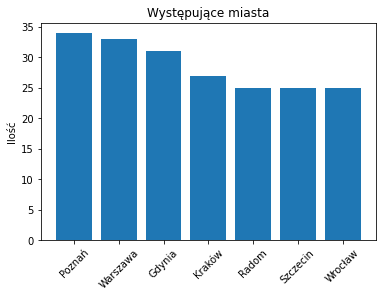

In [7]:
cities = users_df["city"].value_counts()
plot_bar(series=cities, title="Występujące miasta", ylabel="Ilość", rotation=45)

W przypadku tabeli "Users" nie występują żadne braki danych, jednak w atrybucie "street" występują niejednoznaczne zapisy nazw ulic - skrót ul. oraz pełna nazwa "ulica". Najczęściej występującym miastem jest Poznań, a najrzadziej - Radom wraz z Wrocławiem i Szczecinem. Użytkownicy są tylko z miast oraz w kilku województwach nie ma użytkowników.

## Dostawy

In [8]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735 entries, 0 to 6734
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   purchase_id         6735 non-null   int64 
 1   purchase_timestamp  6735 non-null   object
 2   delivery_timestamp  6735 non-null   object
 3   delivery_company    6735 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 210.6+ KB


In [9]:
deliveries_df["purchase_timestamp"] = pd.to_datetime(deliveries_df["purchase_timestamp"], 
                                                     format='%Y-%m-%dT%H:%M:%S')
deliveries_df["delivery_timestamp"] = pd.to_datetime(deliveries_df["delivery_timestamp"], 
                                                     format='%Y-%m-%dT%H:%M:%S')

### Wyznaczenie przedziału atrybutu "purchase_timestamp"

In [10]:
deliveries_df["purchase_timestamp"].min()

Timestamp('2021-01-01 00:18:25')

In [11]:
deliveries_df["purchase_timestamp"].max()

Timestamp('2021-12-10 06:19:20')

### Liczność występujących miesięcy

In [12]:
deliveries_temp_df = deliveries_df
deliveries_temp_df["month"] = deliveries_temp_df["purchase_timestamp"].apply(lambda x:"%d" % (x.month))
deliveries_temp_df

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,month
0,20001,2021-05-17 02:58:18,2021-05-20 03:00:00,620,5
1,20002,2021-05-22 10:25:01,2021-05-24 10:26:28,360,5
2,20003,2021-01-08 23:15:05,2021-01-10 23:17:28,516,1
3,20004,2021-05-21 13:23:18,2021-05-25 13:27:01,360,5
4,20005,2021-02-20 12:54:25,2021-02-23 12:57:33,516,2
...,...,...,...,...,...
6730,26731,2021-06-28 07:05:24,2021-06-30 07:09:05,516,6
6731,26732,2021-05-28 20:47:52,2021-06-01 20:51:56,516,5
6732,26733,2021-10-28 17:16:20,2021-11-02 17:20:19,360,10
6733,26734,2021-09-02 07:50:58,2021-09-07 07:54:30,360,9


In [13]:
deliveries_temp_df["month"].value_counts()

10    636
7     622
3     611
9     605
4     601
1     597
5     596
6     579
8     577
11    568
2     564
12    179
Name: month, dtype: int64

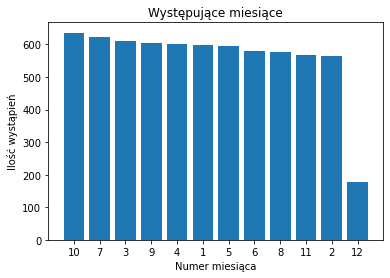

In [14]:
months = deliveries_temp_df["month"].value_counts()
plot_bar(series=months, title="Występujące miesiące", ylabel="Ilość wystąpień", xlabel="Numer miesiąca")

### Dodanie kolumny z czasem dostawy

In [15]:
deliveries_df["deliver_time"] = (deliveries_df["delivery_timestamp"] - deliveries_df["purchase_timestamp"])
deliveries_df["deliver_time"] = deliveries_df["deliver_time"] / np.timedelta64(1, 'D')
deliveries_df

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,month,deliver_time
0,20001,2021-05-17 02:58:18,2021-05-20 03:00:00,620,5,3.001181
1,20002,2021-05-22 10:25:01,2021-05-24 10:26:28,360,5,2.001007
2,20003,2021-01-08 23:15:05,2021-01-10 23:17:28,516,1,2.001655
3,20004,2021-05-21 13:23:18,2021-05-25 13:27:01,360,5,4.002581
4,20005,2021-02-20 12:54:25,2021-02-23 12:57:33,516,2,3.002176
...,...,...,...,...,...,...
6730,26731,2021-06-28 07:05:24,2021-06-30 07:09:05,516,6,2.002558
6731,26732,2021-05-28 20:47:52,2021-06-01 20:51:56,516,5,4.002824
6732,26733,2021-10-28 17:16:20,2021-11-02 17:20:19,360,10,5.002766
6733,26734,2021-09-02 07:50:58,2021-09-07 07:54:30,360,9,5.002454


### Wyznaczenie histogramu atrybutu "deliver_time"

In [16]:
deliveries_df["deliver_time"].min()

2.0000578703703704

In [17]:
deliveries_df["deliver_time"].max()

5.003472222222222

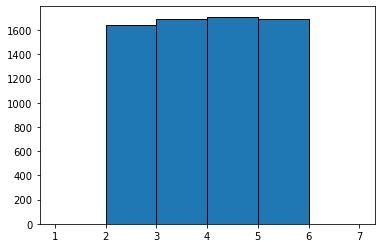

In [18]:
bins = np.arange(1,8)
plt.hist(deliveries_df["deliver_time"], bins=bins, edgecolor='black')
plt.show()

### Analiza atrybutu "deliver_company"

In [19]:
deliveries_df["delivery_company"].value_counts()

620    2298
360    2245
516    2192
Name: delivery_company, dtype: int64

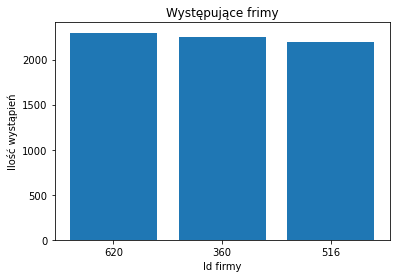

In [20]:
companies = deliveries_df["delivery_company"].value_counts()
plot_bar(series=companies, title="Występujące frimy", ylabel="Ilość wystąpień", xlabel="Id firmy")

In [21]:
deliveries_df.delivery_company.isnull().value_counts()

False    6735
Name: delivery_company, dtype: int64

In [22]:
deliveries_df[deliveries_df.delivery_company.isnull()]

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,month,deliver_time


### Analiza atrybutu "delivery_timestamp"

In [23]:
deliveries_df.delivery_timestamp.isnull().value_counts()

False    6735
Name: delivery_timestamp, dtype: int64

In [24]:
deliveries_df[deliveries_df.delivery_timestamp.isnull()]

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,month,deliver_time


### Ilość wierszy z brakującą zarówno datą dostawy, jak i firmą dostarczającą

In [25]:
filt1 = deliveries_df.delivery_timestamp.isnull()
filt2 = deliveries_df.delivery_company.isnull()
both_nan = np.where(filt1, (np.where(filt2, 1, 0)), 0).sum()
both_nan

0

W celu ułatwienia analizy została dodana kolumna "czas dostawy", która jest różnicą między datą dostarczenia i datą złożenia zamówienia, jednostką jest dzień. Najkrótszy czas dostawy wynosi 2 dni, a najdłuższy - 5 dni. Z histogramu wartości tego atrybutu wynika, że ten atrybut ma rozkład, który najbardziej przypomina rozkład jednostajny. Poza tym najwcześniej zamówienie złożono w styczniu, a najpóźniej - w grudniu.


## Produkty

In [26]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     319 non-null    int64  
 1   product_name   319 non-null    object 
 2   category_path  319 non-null    object 
 3   price          319 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ KB


In [27]:
products_df

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,553.00


In [28]:
products_df[products_df.price <= 0]

,product_id,product_name,category_path,price


In [29]:
products_df[products_df.price > 100000]

,product_id,product_name,category_path,price


In [30]:
products_df.groupby("category_path").size().sort_values(ascending=False)

category_path
Gry i konsole;Gry komputerowe                                        202
Gry i konsole;Gry na konsole;Gry Xbox 360                             32
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                    30
Komputery;Monitory;Monitory LCD                                       17
Gry i konsole;Gry na konsole;Gry PlayStation3                          9
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne         9
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące      5
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe        4
Komputery;Tablety i akcesoria;Tablety                                  2
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4               2
Sprzęt RTV;Video;Odtwarzacze DVD                                       2
Telefony i akcesoria;Telefony komórkowe                                2
Sprzęt RTV;Audio;Słuchawki                                             1
Sprzęt RTV;Video;Telewizory i akcesor

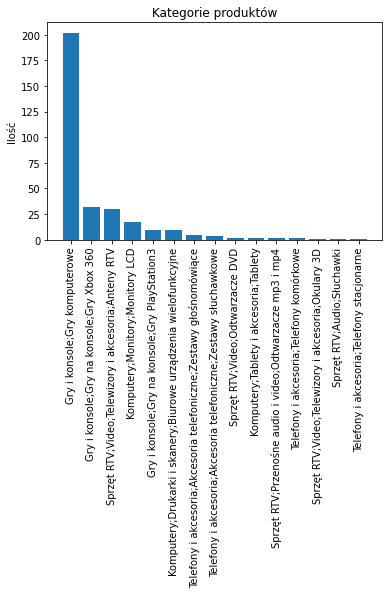

In [31]:
categories = products_df["category_path"].value_counts()
plot_bar(series=categories, title="Kategorie produktów", ylabel="Ilość", rotation=90)

W przypadku tabeli "Products" dominującą klasą są "Gry komputerowe".

## Sesje

In [32]:
sessions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37765 entries, 0 to 37764
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   session_id        37765 non-null  int64         
 1   timestamp         37765 non-null  datetime64[ns]
 2   user_id           37765 non-null  int64         
 3   product_id        37765 non-null  int64         
 4   event_type        37765 non-null  object        
 5   offered_discount  36246 non-null  float64       
 6   purchase_id       8254 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 2.0+ MB


In [33]:
sessions_df.user_id.isnull().sum()

0

In [34]:
sessions_df.product_id.isnull().sum()

0

In [35]:
sessions_df["event_type"].value_counts()

VIEW_PRODUCT      29511
BUY_PRODUCT        6735
RETURN_PRODUCT     1519
Name: event_type, dtype: int64

In [36]:
sessions_df[sessions_df.event_type == "RETURN_PRODUCT"]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
19,130,2021-11-30 00:18:00.498405,102,1293,RETURN_PRODUCT,NaN,20004.0
44,138,2021-11-29 21:45:53.206183,102,1080,RETURN_PRODUCT,NaN,20009.0
65,147,2021-11-29 21:07:31.607449,102,1233,RETURN_PRODUCT,NaN,20013.0
69,149,2021-12-10 04:44:16.907348,102,1276,RETURN_PRODUCT,NaN,20014.0
82,153,2021-11-29 23:13:03.648052,102,1001,RETURN_PRODUCT,NaN,20016.0
...,...,...,...,...,...,...,...
37638,11165,2021-11-28 17:39:02.242481,301,1035,RETURN_PRODUCT,NaN,26716.0
37654,11172,2021-11-28 22:09:40.715446,301,1201,RETURN_PRODUCT,NaN,26720.0
37678,11177,2021-12-03 21:33:44.872208,301,1285,RETURN_PRODUCT,NaN,26723.0
37742,11192,2021-12-06 20:20:11.741370,301,1084,RETURN_PRODUCT,NaN,26732.0


In [37]:
sessions_df[(sessions_df.offered_discount.isnull()) & (sessions_df.event_type != "RETURN_PRODUCT")]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id


In [38]:
sessions_df[sessions_df.session_id.duplicated()]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
2,125,2021-05-17 02:54:53,102,1234,VIEW_PRODUCT,5.0,NaN
3,125,2021-05-17 02:58:18,102,1234,BUY_PRODUCT,5.0,20001.0
6,127,2021-05-22 10:25:01,102,1001,BUY_PRODUCT,0.0,20002.0
8,128,2021-01-08 23:15:05,102,1319,BUY_PRODUCT,15.0,20003.0
10,129,2021-05-21 12:56:54,102,1288,VIEW_PRODUCT,0.0,NaN
...,...,...,...,...,...,...,...
37757,11196,2021-02-15 11:17:51,301,1222,VIEW_PRODUCT,20.0,NaN
37758,11196,2021-02-15 11:17:59,301,1222,BUY_PRODUCT,20.0,26735.0
37761,11198,2021-06-11 19:35:12,301,1316,VIEW_PRODUCT,0.0,NaN
37763,11199,2021-05-13 18:26:12,301,1017,VIEW_PRODUCT,0.0,NaN


### Liczba zamówień w zależności od liczby obejrzanych produktów

In [121]:
buy_purchase_ids = sessions_df[sessions_df.event_type == "BUY_PRODUCT"].purchase_id
buy_purchase_ids

3        20001.0
6        20002.0
8        20003.0
18       20004.0
25       20005.0
          ...   
37732    26731.0
37741    26732.0
37746    26733.0
37754    26734.0
37758    26735.0
Name: purchase_id, Length: 6735, dtype: float64

In [122]:
buy_sessions = sessions_df[sessions_df.purchase_id.isin(buy_purchase_ids)]
buy_sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
3,125,2021-05-17 02:58:18.000000,102,1234,BUY_PRODUCT,5.0,20001.0
6,127,2021-05-22 10:25:01.000000,102,1001,BUY_PRODUCT,0.0,20002.0
8,128,2021-01-08 23:15:05.000000,102,1319,BUY_PRODUCT,15.0,20003.0
18,129,2021-05-21 13:23:18.000000,102,1293,BUY_PRODUCT,0.0,20004.0
19,130,2021-11-30 00:18:00.498405,102,1293,RETURN_PRODUCT,NaN,20004.0
...,...,...,...,...,...,...,...
37742,11192,2021-12-06 20:20:11.741370,301,1084,RETURN_PRODUCT,NaN,26732.0
37746,11193,2021-10-28 17:16:20.000000,301,1319,BUY_PRODUCT,10.0,26733.0
37754,11194,2021-09-02 07:50:58.000000,301,1075,BUY_PRODUCT,5.0,26734.0
37758,11196,2021-02-15 11:17:59.000000,301,1222,BUY_PRODUCT,20.0,26735.0


In [123]:
view_and_bought = sessions_df[(sessions_df.session_id.isin(buy_sessions.session_id)) & (sessions_df.event_type == "VIEW_PRODUCT")]
view_and_bought

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
1,125,2021-05-17 02:54:18,102,1233,VIEW_PRODUCT,5.0,NaN
2,125,2021-05-17 02:54:53,102,1234,VIEW_PRODUCT,5.0,NaN
5,127,2021-05-22 10:24:28,102,1001,VIEW_PRODUCT,0.0,NaN
7,128,2021-01-08 23:14:49,102,1319,VIEW_PRODUCT,15.0,NaN
9,129,2021-05-21 12:56:12,102,1287,VIEW_PRODUCT,0.0,NaN
...,...,...,...,...,...,...,...
37751,11194,2021-09-02 07:46:31,301,1081,VIEW_PRODUCT,5.0,NaN
37752,11194,2021-09-02 07:48:39,301,1080,VIEW_PRODUCT,5.0,NaN
37753,11194,2021-09-02 07:49:13,301,1075,VIEW_PRODUCT,5.0,NaN
37756,11196,2021-02-15 11:13:10,301,1201,VIEW_PRODUCT,20.0,NaN


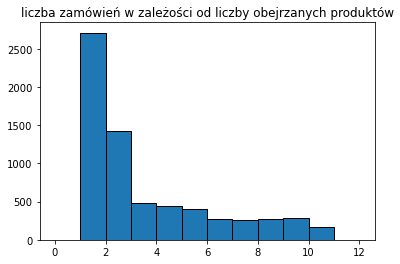

In [127]:
view_count = view_and_bought.session_id.value_counts()
bins = np.arange(0,13)
plt.hist(view_count, bins=bins, edgecolor='black')
plt.title("liczba zamówień w zależości od liczby obejrzanych produktów")
plt.show()

### Liczba zwrotów w zależności od liczby obejrzanych produktów

In [40]:
return_purchase_ids = sessions_df[sessions_df.event_type == "RETURN_PRODUCT"].purchase_id
return_purchase_ids

19       20004.0
44       20009.0
65       20013.0
69       20014.0
82       20016.0
          ...   
37638    26716.0
37654    26720.0
37678    26723.0
37742    26732.0
37759    26735.0
Name: purchase_id, Length: 1519, dtype: float64

In [41]:
return_sessions = sessions_df[sessions_df.purchase_id.isin(return_purchase_ids)]
return_sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
18,129,2021-05-21 13:23:18.000000,102,1293,BUY_PRODUCT,0.0,20004.0
19,130,2021-11-30 00:18:00.498405,102,1293,RETURN_PRODUCT,NaN,20004.0
43,137,2021-07-06 15:01:06.000000,102,1080,BUY_PRODUCT,10.0,20009.0
44,138,2021-11-29 21:45:53.206183,102,1080,RETURN_PRODUCT,NaN,20009.0
64,146,2021-04-04 20:18:06.000000,102,1233,BUY_PRODUCT,0.0,20013.0
...,...,...,...,...,...,...,...
37678,11177,2021-12-03 21:33:44.872208,301,1285,RETURN_PRODUCT,NaN,26723.0
37741,11191,2021-05-28 20:47:52.000000,301,1084,BUY_PRODUCT,10.0,26732.0
37742,11192,2021-12-06 20:20:11.741370,301,1084,RETURN_PRODUCT,NaN,26732.0
37758,11196,2021-02-15 11:17:59.000000,301,1222,BUY_PRODUCT,20.0,26735.0


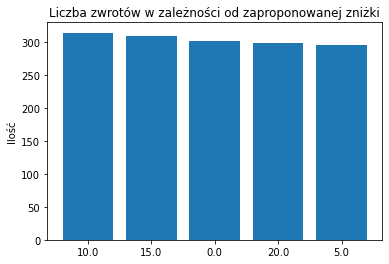

In [42]:
discounts = return_sessions["offered_discount"].value_counts()
plot_bar(series=discounts, title="Liczba zwrotów w zależności od zaproponowanej zniżki", ylabel="Ilość")

In [43]:
view_and_returned = sessions_df[(sessions_df.session_id.isin(return_sessions.session_id)) & (sessions_df.event_type == "VIEW_PRODUCT")]
view_and_returned

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
9,129,2021-05-21 12:56:12,102,1287,VIEW_PRODUCT,0.0,NaN
10,129,2021-05-21 12:56:54,102,1288,VIEW_PRODUCT,0.0,NaN
11,129,2021-05-21 13:01:43,102,1291,VIEW_PRODUCT,0.0,NaN
12,129,2021-05-21 13:04:42,102,1289,VIEW_PRODUCT,0.0,NaN
13,129,2021-05-21 13:08:50,102,1284,VIEW_PRODUCT,0.0,NaN
...,...,...,...,...,...,...,...
37738,11191,2021-05-28 20:36:08,301,1040,VIEW_PRODUCT,10.0,NaN
37739,11191,2021-05-28 20:38:23,301,1047,VIEW_PRODUCT,10.0,NaN
37740,11191,2021-05-28 20:43:22,301,1084,VIEW_PRODUCT,10.0,NaN
37756,11196,2021-02-15 11:13:10,301,1201,VIEW_PRODUCT,20.0,NaN


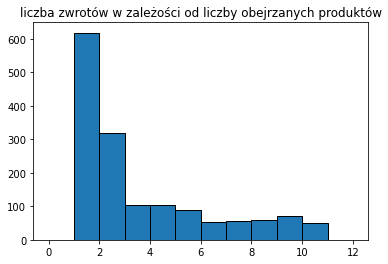

In [44]:
view_count = view_and_returned.session_id.value_counts()
bins = np.arange(0,13)
plt.hist(view_count, bins=bins, edgecolor='black')
plt.title("liczba zwrotów w zależości od liczby obejrzanych produktów")
plt.show()

Z tabeli sesji wynika, że dokonano 1519 zwrotów, a zakupów - 6735.

Histogramy liczby zamówień i zwrotów są bardzo podobne do siebie, stąd jedyna zależność między zwrotami zamówień i liczbą obejrzanych produktów to liczba dokonanych zakupów. Zaproponowane zniżki przy zwróconych zamówieniach rozkładają się jednostajnie, więc zniżka ma raczej mały wpływ na zwrot

# Analiza łączna

### Połączenie tabeli dostaw z tabelą sesji

In [48]:
deliv_sess_df =  pd.merge(sessions_df, deliveries_df, how='inner', on = 'purchase_id')
deliv_sess_df[deliv_sess_df.event_type == "RETURN_PRODUCT"]

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,month,deliver_time
4,130,2021-11-30 00:18:00.498405,102,1293,RETURN_PRODUCT,NaN,20004.0,2021-05-21 13:23:18,2021-05-25 13:27:01,360,5,4.002581
10,138,2021-11-29 21:45:53.206183,102,1080,RETURN_PRODUCT,NaN,20009.0,2021-07-06 15:01:06,2021-07-10 15:04:23,360,7,4.002280
15,147,2021-11-29 21:07:31.607449,102,1233,RETURN_PRODUCT,NaN,20013.0,2021-04-04 20:18:06,2021-04-08 20:21:03,516,4,4.002049
17,149,2021-12-10 04:44:16.907348,102,1276,RETURN_PRODUCT,NaN,20014.0,2021-07-15 02:43:54,2021-07-20 02:46:07,516,7,5.001539
20,153,2021-11-29 23:13:03.648052,102,1001,RETURN_PRODUCT,NaN,20016.0,2021-07-11 13:04:41,2021-07-16 13:08:14,360,7,5.002465
...,...,...,...,...,...,...,...,...,...,...,...,...
8230,11165,2021-11-28 17:39:02.242481,301,1035,RETURN_PRODUCT,NaN,26716.0,2021-05-24 10:22:37,2021-05-28 10:26:34,620,5,4.002743
8235,11172,2021-11-28 22:09:40.715446,301,1201,RETURN_PRODUCT,NaN,26720.0,2021-03-10 21:00:04,2021-03-12 21:00:10,620,3,2.000069
8239,11177,2021-12-03 21:33:44.872208,301,1285,RETURN_PRODUCT,NaN,26723.0,2021-04-20 12:06:28,2021-04-23 12:10:51,516,4,3.003044
8249,11192,2021-12-06 20:20:11.741370,301,1084,RETURN_PRODUCT,NaN,26732.0,2021-05-28 20:47:52,2021-06-01 20:51:56,516,5,4.002824


### Wpływ firmy kurierskiej na zwrot zamówień

In [107]:
deliv_sess_df[deliv_sess_df.event_type == "BUY_PRODUCT"].delivery_company.value_counts()

620    2298
360    2245
516    2192
Name: delivery_company, dtype: int64

In [50]:
deliv_sess_df[deliv_sess_df.event_type == "RETURN_PRODUCT"].delivery_company.value_counts()

360    531
620    504
516    484
Name: delivery_company, dtype: int64

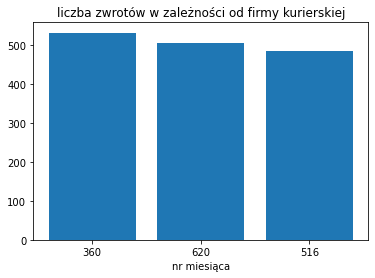

In [51]:
companies_ret = deliv_sess_df[deliv_sess_df.event_type == "RETURN_PRODUCT"].delivery_company.value_counts()
plot_bar(companies_ret, xlabel="nr miesiąca", title="liczba zwrotów w zależności od firmy kurierskiej")

Warto tu zauważyć fakt, że firma kurierska o id 360 brała udział w mniejszej liczbie dostarczanych zamówień niz firma 620, a mimo to firma 360 uczestniczyła w największej liczbie zwrotów (jednak ta różnica nie jest aż tak znacząca)

### Wyznaczenie histogramu czasu dostawy zamówień zwróconych 

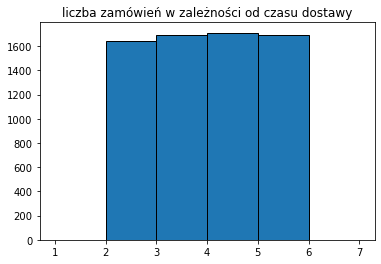

In [110]:
bins = np.arange(1,8)
a_df = deliv_sess_df[deliv_sess_df.event_type == "BUY_PRODUCT"]
plt.hist(a_df["deliver_time"], bins=bins, edgecolor='black')
plt.title("liczba zamówień w zależności od czasu dostawy")
plt.show()

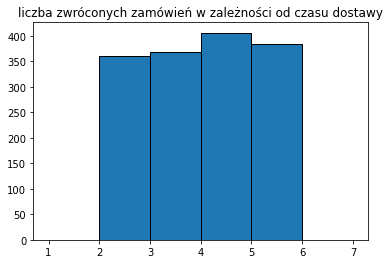

In [109]:
bins = np.arange(1,8)
a_df = deliv_sess_df[deliv_sess_df.event_type == "RETURN_PRODUCT"]
plt.hist(a_df["deliver_time"], bins=bins, edgecolor='black')
plt.title("liczba zwróconych zamówień w zależności od czasu dostawy")
plt.show()

Histogram z zwrotami różni się od histogramu z złożonymi zamówieniami - różnica w liczności przedziału [4, 5] z licznościami innych zakresów jest widoczniejsza

### Wpływ miesiąca na zwrot zamówienia

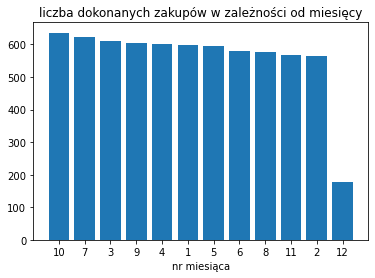

In [54]:
months_ret = deliv_sess_df[deliv_sess_df.event_type == "BUY_PRODUCT"].month.value_counts()
plot_bar(months_ret, xlabel="nr miesiąca", title="liczba dokonanych zakupów w zależności od miesięcy")

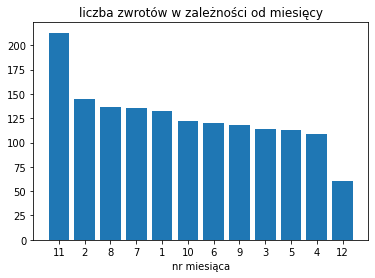

In [56]:
months_ret = deliv_sess_df[deliv_sess_df.event_type == "RETURN_PRODUCT"].month.value_counts()
plot_bar(months_ret, xlabel="nr miesiąca", title="liczba zwrotów w zależności od miesięcy")

Z powyższych wykresów wynika, że chociaż w listopadzie, lutym i sierpniu dokonano mniej zakupów niż w pozostałych miesiącach, to i tak w nich miało miejsce najwięcej zwrotów. Ponadto liczba zwrotów w listopadzie jest znacząco większa niż w pozostałych miesiącach

## Dodanie tabeli produktów do tabel z dostawami i sesjami

In [57]:
deliv_sess_prod_df = pd.merge(deliv_sess_df, products_df, how='inner', on = 'product_id')
deliv_sess_prod_df

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,month,deliver_time,product_name,category_path,price
0,125,2021-05-17 02:58:18.000000,102,1234,BUY_PRODUCT,5.0,20001.0,2021-05-17 02:58:18,2021-05-20 03:00:00,620,5,3.001181,Sony DVP-SR760,Sprzęt RTV;Video;Odtwarzacze DVD,193.0
1,159,2021-03-08 06:56:06.000000,102,1234,BUY_PRODUCT,5.0,20021.0,2021-03-08 06:56:06,2021-03-13 06:59:14,516,3,5.002176,Sony DVP-SR760,Sprzęt RTV;Video;Odtwarzacze DVD,193.0
2,180,2021-02-09 04:10:53.000000,102,1234,BUY_PRODUCT,20.0,20035.0,2021-02-09 04:10:53,2021-02-12 04:15:18,620,2,3.003067,Sony DVP-SR760,Sprzęt RTV;Video;Odtwarzacze DVD,193.0
3,181,2021-02-16 11:29:47.186189,102,1234,RETURN_PRODUCT,NaN,20035.0,2021-02-09 04:10:53,2021-02-12 04:15:18,620,2,3.003067,Sony DVP-SR760,Sprzęt RTV;Video;Odtwarzacze DVD,193.0
4,273,2021-01-24 07:06:30.000000,104,1234,BUY_PRODUCT,10.0,20098.0,2021-01-24 07:06:30,2021-01-27 07:08:09,360,1,3.001146,Sony DVP-SR760,Sprzęt RTV;Video;Odtwarzacze DVD,193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,10801,2021-06-14 02:02:35.000000,294,1289,BUY_PRODUCT,0.0,26489.0,2021-06-14 02:02:35,2021-06-16 02:06:18,360,6,2.002581,Philips SDV5225,Sprzęt RTV;Video;Telewizory i akcesoria;Anteny...,129.0
8250,10802,2021-11-29 18:18:33.950183,294,1289,RETURN_PRODUCT,NaN,26489.0,2021-06-14 02:02:35,2021-06-16 02:06:18,360,6,2.002581,Philips SDV5225,Sprzęt RTV;Video;Telewizory i akcesoria;Anteny...,129.0
8251,10995,2021-05-18 10:50:09.000000,297,1289,BUY_PRODUCT,5.0,26606.0,2021-05-18 10:50:09,2021-05-23 10:51:42,360,5,5.001076,Philips SDV5225,Sprzęt RTV;Video;Telewizory i akcesoria;Anteny...,129.0
8252,10996,2021-12-05 04:59:03.181704,297,1289,RETURN_PRODUCT,NaN,26606.0,2021-05-18 10:50:09,2021-05-23 10:51:42,360,5,5.001076,Philips SDV5225,Sprzęt RTV;Video;Telewizory i akcesoria;Anteny...,129.0


### Wpływ kategorii na liczbę zwrotów

In [120]:
deliv_sess_prod_df[deliv_sess_prod_df.event_type == "BUY_PRODUCT"].category_path.value_counts()

Telefony i akcesoria;Telefony komórkowe                              491
Gry i konsole;Gry na konsole;Gry PlayStation3                        473
Telefony i akcesoria;Telefony stacjonarne                            467
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                   466
Gry i konsole;Gry komputerowe                                        461
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4             459
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe      453
Sprzęt RTV;Audio;Słuchawki                                           451
Komputery;Monitory;Monitory LCD                                      445
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne       442
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D                   438
Sprzęt RTV;Video;Odtwarzacze DVD                                     436
Komputery;Tablety i akcesoria;Tablety                                430
Gry i konsole;Gry na konsole;Gry Xbox 360          

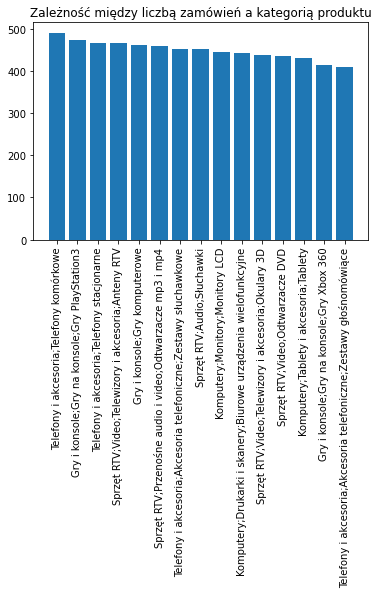

In [119]:
categories = deliv_sess_prod_df[deliv_sess_prod_df.event_type == "BUY_PRODUCT"].category_path.value_counts()
plot_bar(categories, rotation=90, 
         title="Zależność między liczbą zamówień a kategorią produktu")

In [65]:
deliv_sess_prod_df[deliv_sess_prod_df.event_type == "RETURN_PRODUCT"].category_path.value_counts()

Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                   115
Sprzęt RTV;Video;Odtwarzacze DVD                                     111
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4             109
Telefony i akcesoria;Telefony komórkowe                              107
Gry i konsole;Gry na konsole;Gry PlayStation3                        107
Komputery;Tablety i akcesoria;Tablety                                106
Gry i konsole;Gry na konsole;Gry Xbox 360                            105
Sprzęt RTV;Audio;Słuchawki                                           104
Gry i konsole;Gry komputerowe                                        102
Telefony i akcesoria;Telefony stacjonarne                            100
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące     94
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne        91
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe       91
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D 

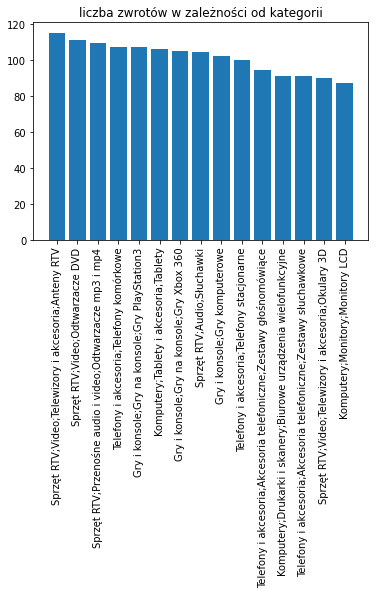

In [111]:
categories_ret = deliv_sess_prod_df[deliv_sess_prod_df.event_type == "RETURN_PRODUCT"].category_path.value_counts()
plot_bar(categories_ret, rotation=90, title="liczba zwrotów w zależności od kategorii")

Powyższe wykresy są podobne do siebie, lecz poszczególne kategorie są zamienione kolejnością. Stąd wynika, że kategoria produktu może mieć wpływ na zwroty zamówień, ale mniejszy niż miesiąc składania zamówienia

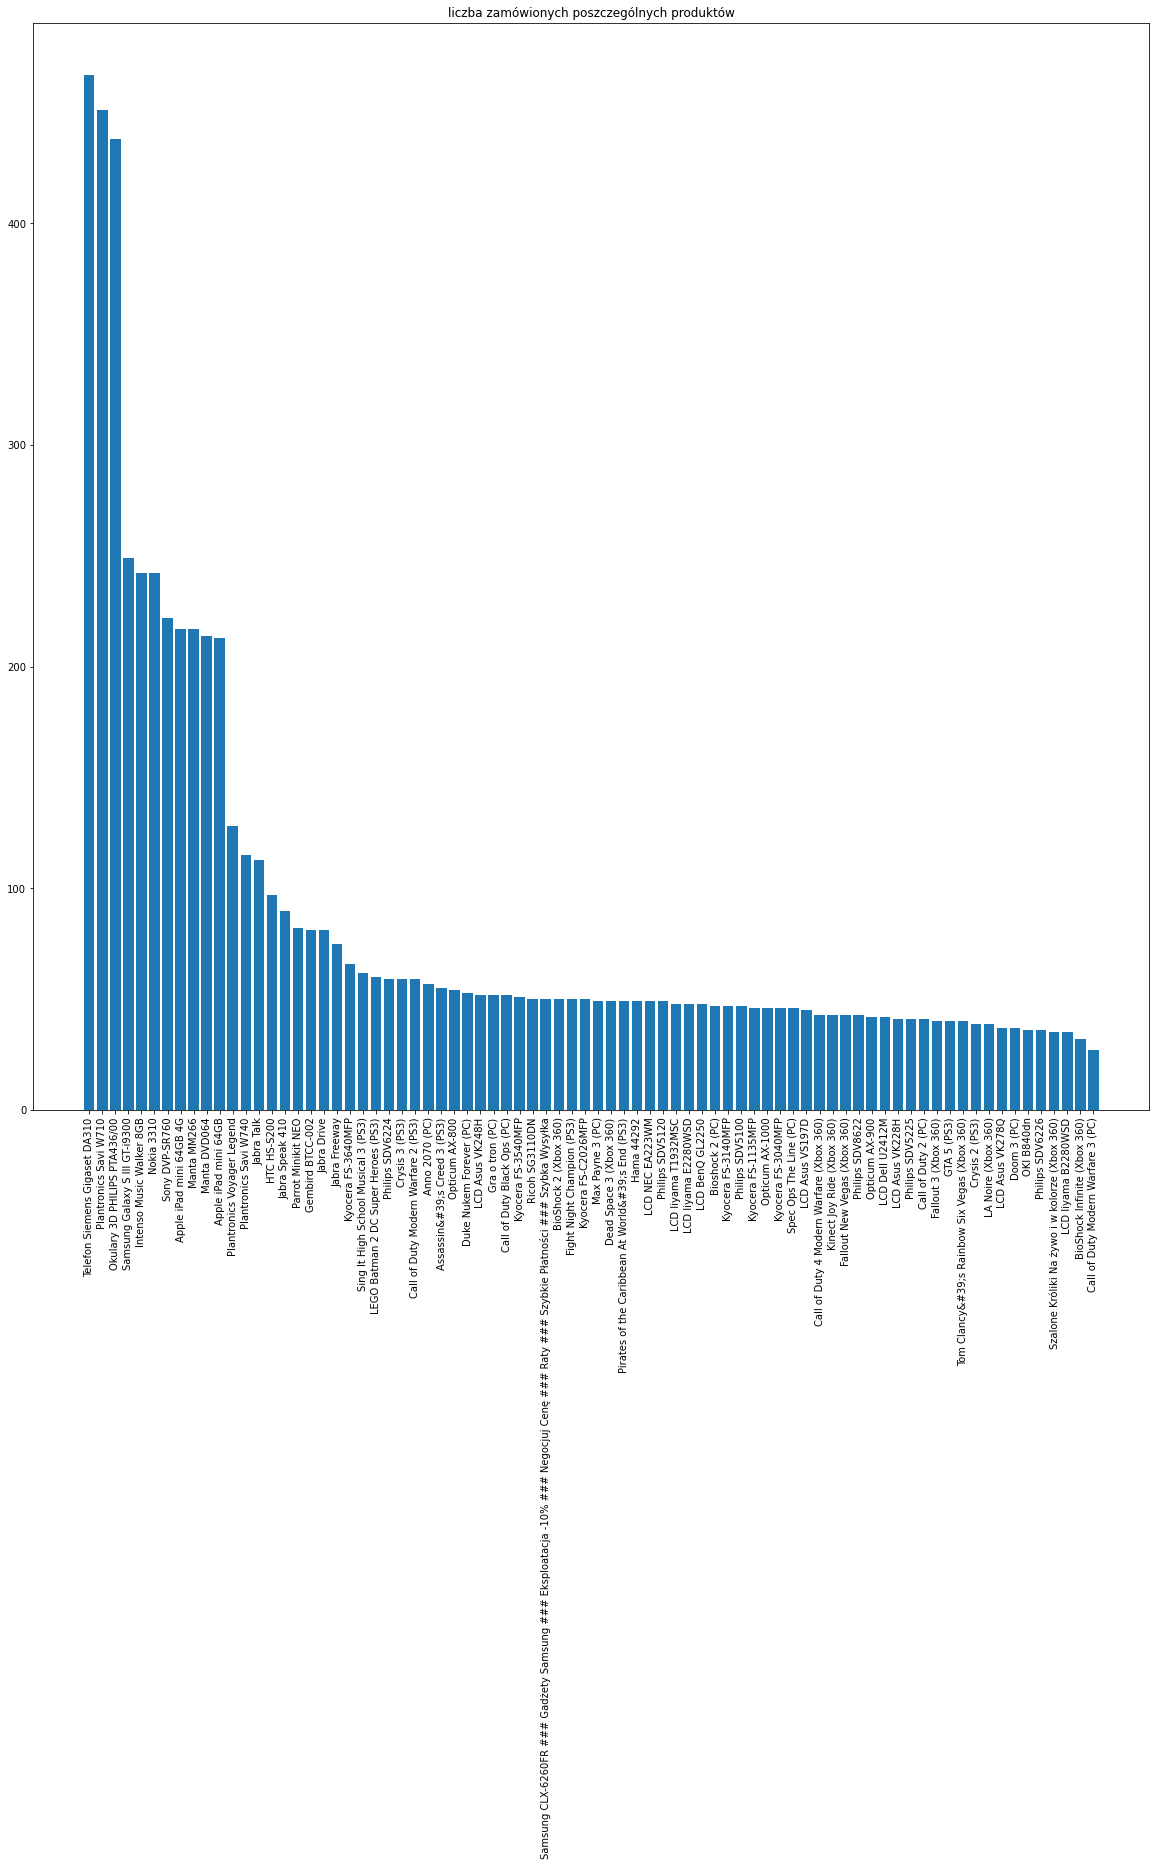

In [112]:
prod_name = deliv_sess_prod_df[deliv_sess_prod_df.event_type == "BUY_PRODUCT"].product_name.value_counts()
plot_bar(prod_name, rotation=90, figsize=(20,20), title="liczba zamówionych poszczególnych produktów")

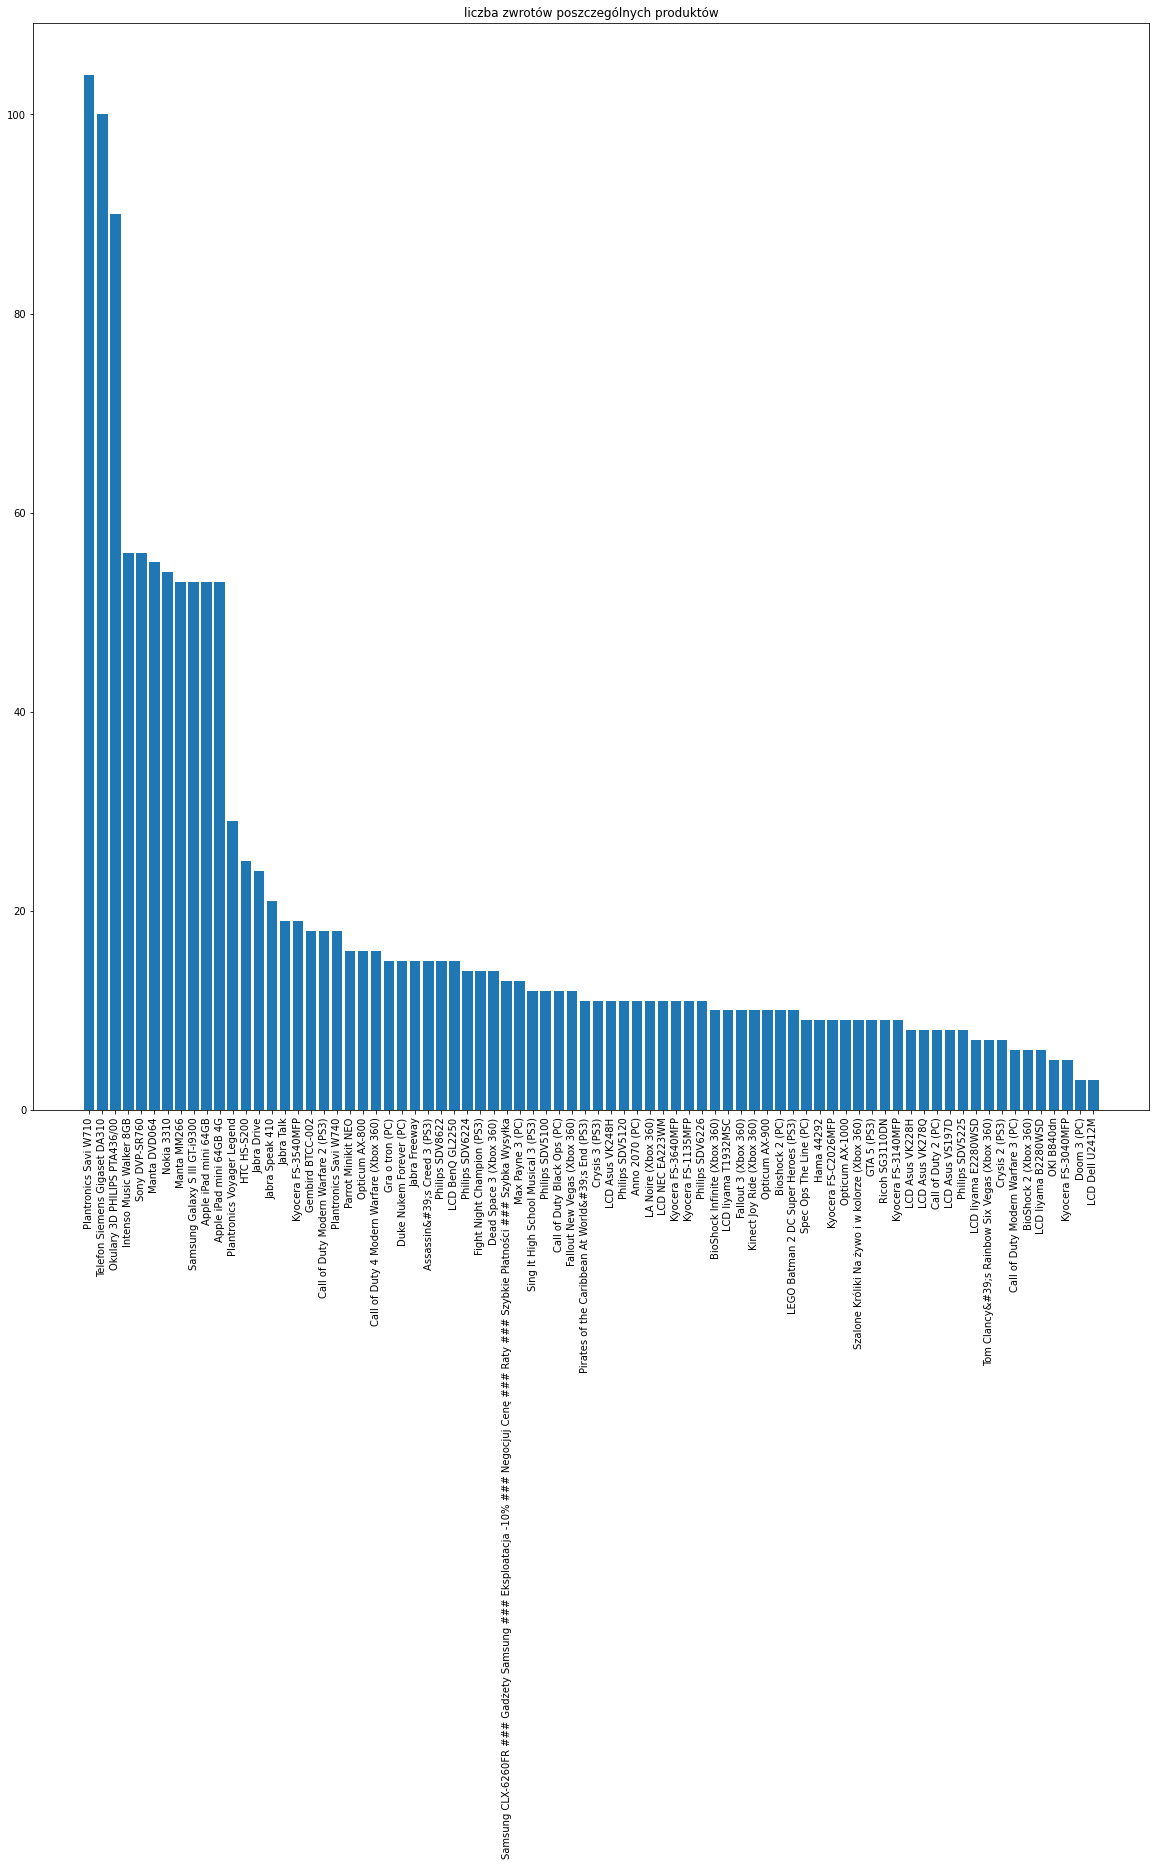

In [113]:
prod_name_ret = deliv_sess_prod_df[deliv_sess_prod_df.event_type == "RETURN_PRODUCT"].product_name.value_counts()
plot_bar(prod_name_ret, rotation=90, figsize=(20, 20), title="liczba zwrotów poszczególnych produktów")

Powyższe wykresy są podobne do siebie, lecz poszczególne nazwy są zamienione kolejnością. Stąd wynika, że nazwa może mieć wpływ na zwroty zamówień, ale mniejszy niż miesiąc składania zamówienia

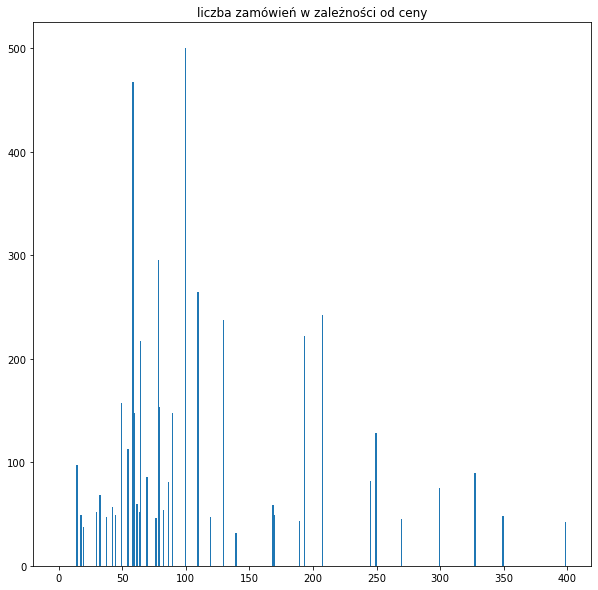

In [117]:
bins = np.arange(0, 400)
temp_df = deliv_sess_prod_df[deliv_sess_prod_df.event_type == "BUY_PRODUCT"]
plt.figure(figsize=(10, 10))
plt.hist(temp_df["price"], bins=bins)
plt.title("liczba zamówień w zależności od ceny")
plt.show()

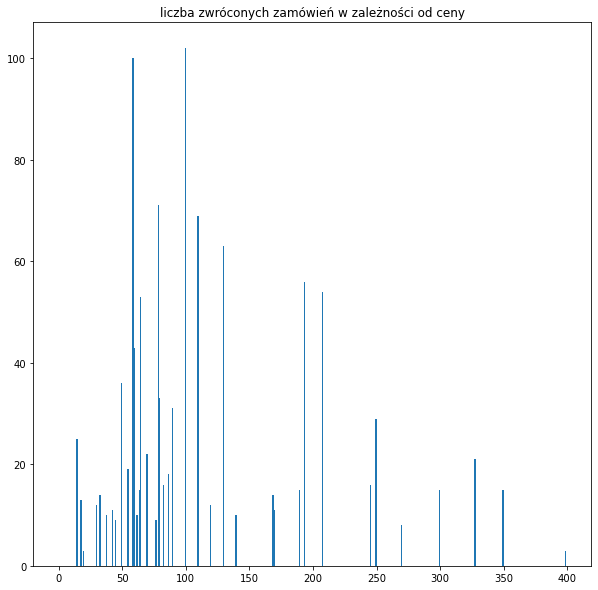

In [116]:
bins = np.arange(0, 400)
temp_df = deliv_sess_prod_df[deliv_sess_prod_df.event_type == "RETURN_PRODUCT"]
plt.figure(figsize=(10, 10))
plt.hist(temp_df["price"], bins=bins)
plt.title("liczba zwróconych zamówień w zależności od ceny")
plt.show()

Powyższe histogramy są bardzo podobne do siebie, więc cena raczej nie ma znaczącego wpływu na liczbę zwrotów

## Dodanie tabeli użytkowników do tabel z dostawami i sesjami

In [67]:
deliv_sess_user_df = pd.merge(deliv_sess_df, users_df, how='inner', on = 'user_id')
deliv_sess_user_df

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,month,deliver_time,name,city,street
0,125,2021-05-17 02:58:18.000000,102,1234,BUY_PRODUCT,5.0,20001.0,2021-05-17 02:58:18,2021-05-20 03:00:00,620,5,3.001181,Klara Sałuda,Szczecin,ulica Dębowa 64/65
1,127,2021-05-22 10:25:01.000000,102,1001,BUY_PRODUCT,0.0,20002.0,2021-05-22 10:25:01,2021-05-24 10:26:28,360,5,2.001007,Klara Sałuda,Szczecin,ulica Dębowa 64/65
2,128,2021-01-08 23:15:05.000000,102,1319,BUY_PRODUCT,15.0,20003.0,2021-01-08 23:15:05,2021-01-10 23:17:28,516,1,2.001655,Klara Sałuda,Szczecin,ulica Dębowa 64/65
3,129,2021-05-21 13:23:18.000000,102,1293,BUY_PRODUCT,0.0,20004.0,2021-05-21 13:23:18,2021-05-25 13:27:01,360,5,4.002581,Klara Sałuda,Szczecin,ulica Dębowa 64/65
4,130,2021-11-30 00:18:00.498405,102,1293,RETURN_PRODUCT,NaN,20004.0,2021-05-21 13:23:18,2021-05-25 13:27:01,360,5,4.002581,Klara Sałuda,Szczecin,ulica Dębowa 64/65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,11192,2021-12-06 20:20:11.741370,301,1084,RETURN_PRODUCT,NaN,26732.0,2021-05-28 20:47:52,2021-06-01 20:51:56,516,5,4.002824,Olga Matus,Kraków,al. Sucharskiego 46
8250,11193,2021-10-28 17:16:20.000000,301,1319,BUY_PRODUCT,10.0,26733.0,2021-10-28 17:16:20,2021-11-02 17:20:19,360,10,5.002766,Olga Matus,Kraków,al. Sucharskiego 46
8251,11194,2021-09-02 07:50:58.000000,301,1075,BUY_PRODUCT,5.0,26734.0,2021-09-02 07:50:58,2021-09-07 07:54:30,360,9,5.002454,Olga Matus,Kraków,al. Sucharskiego 46
8252,11196,2021-02-15 11:17:59.000000,301,1222,BUY_PRODUCT,20.0,26735.0,2021-02-15 11:17:59,2021-02-18 11:22:36,360,2,3.003206,Olga Matus,Kraków,al. Sucharskiego 46


### Wpływ atrybutu miasto na liczbę zwrotu

In [68]:
deliv_sess_user_df["city"].value_counts()

Poznań      1562
Gdynia      1459
Warszawa    1307
Szczecin    1094
Radom       1017
Wrocław      944
Kraków       871
Name: city, dtype: int64

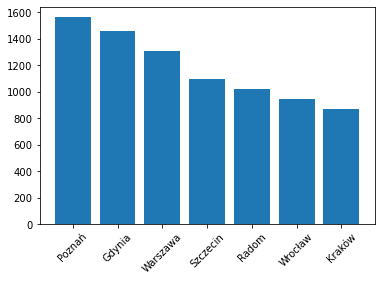

In [69]:
cities = deliv_sess_user_df["city"].value_counts()
plot_bar(cities, rotation=45)

In [76]:
deliv_sess_user_df[deliv_sess_user_df.event_type == "RETURN_PRODUCT"].city.value_counts()

Gdynia      285
Poznań      264
Warszawa    229
Szczecin    203
Wrocław     190
Radom       181
Kraków      167
Name: city, dtype: int64

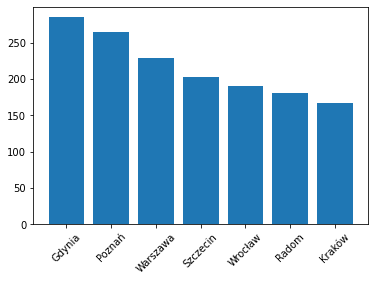

In [80]:
cities_ret = deliv_sess_user_df[deliv_sess_user_df.event_type == "RETURN_PRODUCT"].city.value_counts()
plot_bar(cities_ret, rotation=45)

Powyższe wykresy są bardzo podobne do siebie, lecz poszczególne miasta są pozamieniane kolejnością, np. najwięcej zwrotów jest z Gdyni, chociaż to z Poznania dokonano najwięcej zakupów. Stąd wynika, że atrybut miasto może mieć wpływ na liczbę zwrotów, ale mniejszy niż miesiąc dokonywania zamówienia

# Podsumowanie

- zbiór danych jest poprawny pod względem logicznym (poza jedną nazwą produktu, ale ten błąd nie jest krytyczny)
- w tym zbiorze nie występują braki danych
- ten zbiór zawiera małą liczbę zamówień z grudnia (ostatnie zamówienie złożono 10 grudnia)
- na zwrot zamówienia wpływ prawdopodobnie mają następujące atrybuty: miesiąc składania zamówienia, miasto, kategoria produktu, nazwa produktu, firma kurierska, czas dostawy